In [1]:
#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

#imports for user defined functions
from env import host, user, password, get_db_url

# Imports for arithmetic calculations and data frame manipulation
import math
import numpy as np
import pandas as pd

#imports for splitting data and imputing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#Imports for creating visualizations
import matplotlib.pyplot as plt 
import seaborn as sns

import viz

from pydataset import data

import wrangle_zillow as wr
import wrangle_mall as wm

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species']

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


## 1. Clustering with the Iris Dataset
**a. Choose features other than the ones used in the lesson.**

In [6]:
X = iris[['petal_width', 'sepal_width']]

In [7]:
# set up k means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

**b. Visualize the results of your clustering.**

In [8]:
iris['cluster'] = kmeans.predict(X)

In [10]:
# Calculate cluster centers for visualization
kmeans.cluster_centers_
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_width,sepal_width
0,0.244898,3.451020
1,1.309434,2.707547
2,2.052083,3.041667


Text(0.5, 1.0, 'Visualizing Clusters')

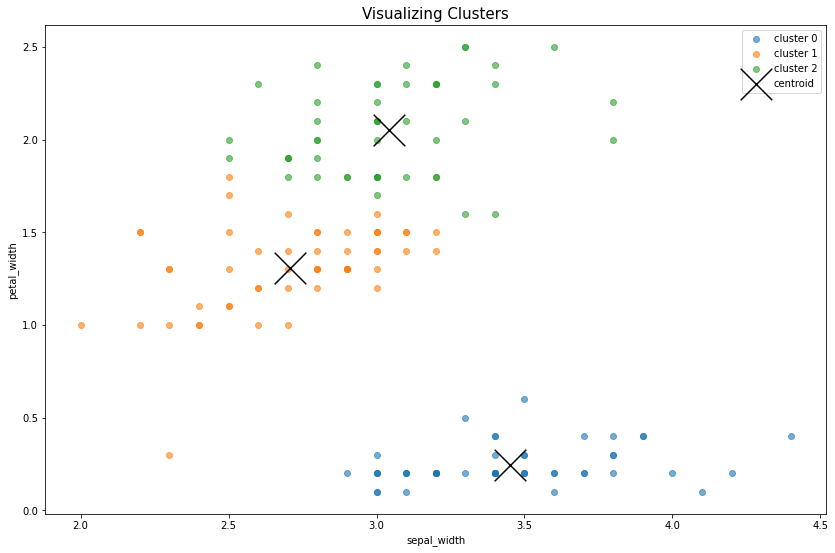

In [11]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters', fontsize=15)


**c. Use the elbow method to visually select a good value for k.**

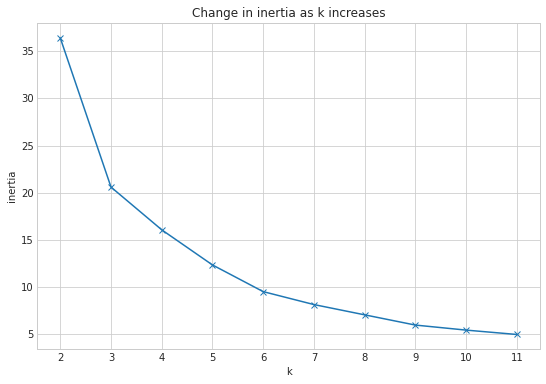

In [12]:
## Using elbow method 
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


*Based on this visualization it looks like 3 or 4 should be a good k value.*

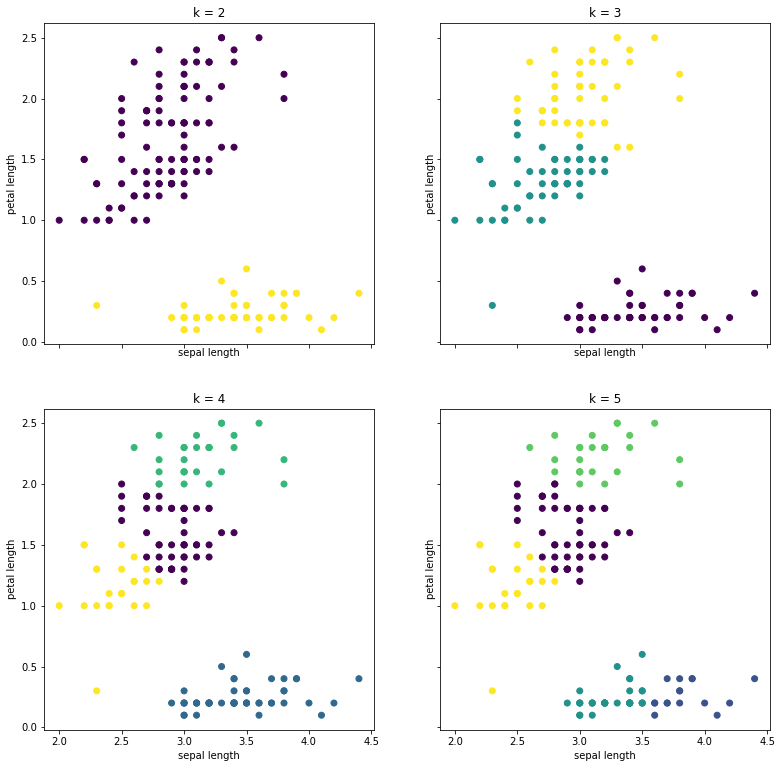

In [13]:
# Let's visualize what our clusters look like using different k values

fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.sepal_width, X.petal_width, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal length', ylabel='petal length')


*Based on this I still think k=3 is ideal.*

d. Repeat the clustering, this time with 3 different features.

In [14]:
# Redefine X using 3 featrues
X = iris[['petal_width', 'sepal_width', 'petal_length']]

In [15]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['3_features_cluster'] = kmeans.predict(X)

Text(0.5, 1.0, 'Visualizing Clusters')

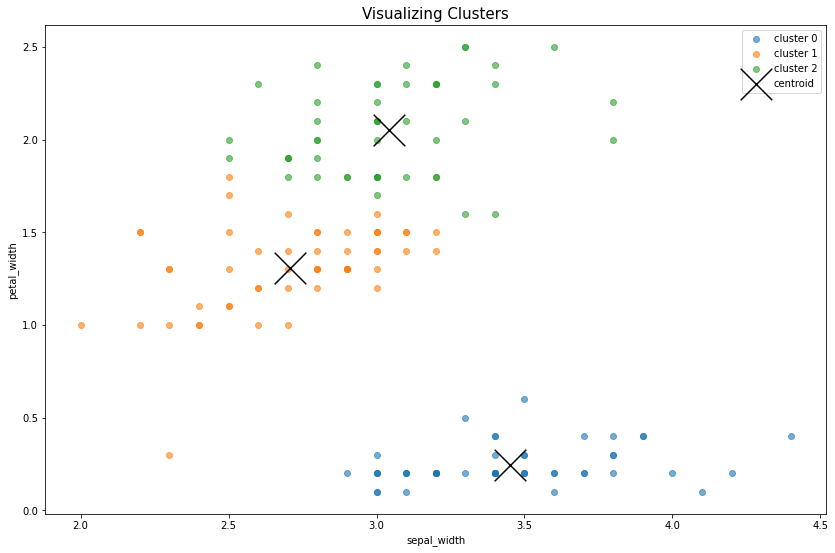

In [16]:
plt.figure(figsize=(14, 9))

for cluster, subset in iris.groupby('cluster'):
    plt.scatter(subset.sepal_width, subset.petal_width, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_width', x='sepal_width', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_width')
plt.ylabel('petal_width')
plt.title('Visualizing Clusters', fontsize=15)

## 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [17]:
df = wm.get_mall()
df.head()

Using cached csv...


,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
# Create dummy variable for gender
cat_vars=['gender']
df = wm.encode_categorical(df, cat_vars)
df.head()

,customer_id,age,annual_income,spending_score,gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [19]:
#rename gender_Male
df = df.rename(columns={'gender_Male':'male'})
df.head()

,customer_id,age,annual_income,spending_score,male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [20]:
X = df[['annual_income', 'spending_score']]

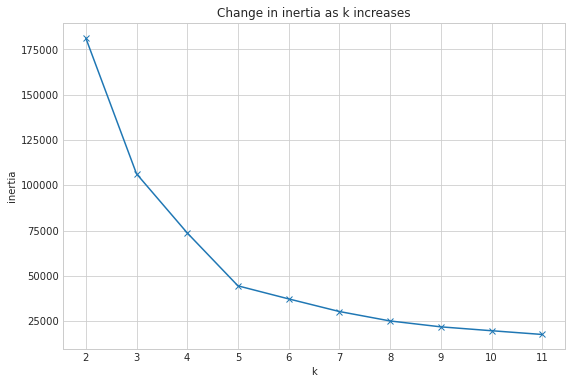

In [21]:
## Using elbow method to get ideal k value
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


*Based on this visualization I'm going to use 5 clusters.*

It looks like 5 should be a good k value.

In [22]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df['cluster'] = kmeans.predict(X)
df.head()

,customer_id,age,annual_income,spending_score,male,cluster
0,1,19,15,39,1,0
1,2,21,15,81,1,2
2,3,20,16,6,0,0
3,4,23,16,77,0,2
4,5,31,17,40,0,0


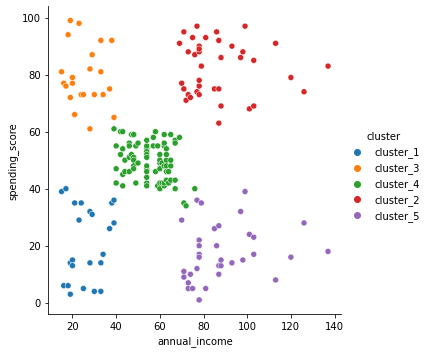

In [23]:
# Visualize results
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='annual_income', y='spending_score', hue='cluster')


## 3. How does scaling impact the results of clustering?

*Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.*

In [24]:
# Creating a scaled data frame

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])
X_scaled.head()

,annual_income,spending_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [25]:
# Does scaling affect the elbow method?

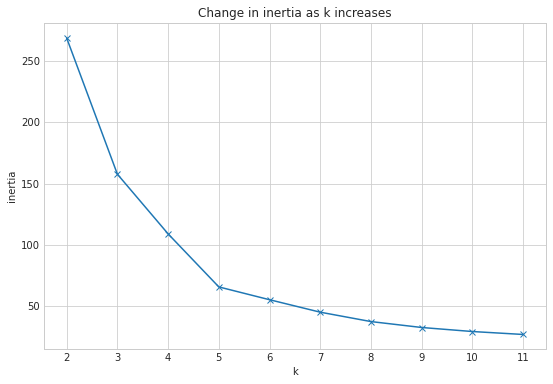

In [26]:
## Using elbow method to get ideal k value
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X_scaled).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


*Results look relatively the same after scaling. I'll stick with 5 clusters.*

In [27]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled)

X_scaled['cluster'] = kmeans.predict(X_scaled)
X_scaled.head()

,annual_income,spending_score,cluster
0,-1.738999,-0.434801,1
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,1
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,1


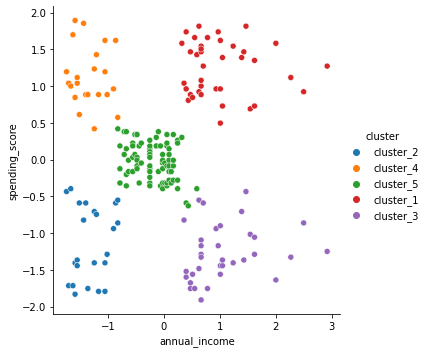

In [30]:
# Visualize results
X_scaled.cluster = 'cluster_' + (X_scaled.cluster + 1).astype('str')
sns.relplot(data=X_scaled, x='annual_income', y='spending_score', hue='cluster')


*The scaled clusters look relatively similar.*